<a href="https://colab.research.google.com/github/SarkarPriyanshu/USHousingMarketAnalysis/blob/main/03_Model_Development_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Table of Contents

- [Model Development](#model-development)
- [Model Selection](#model-selection)
  - [Observation Of Model Development](#observation-of-model-development)
- [Experimentation](#experimentation)
    - [Linear Regressor Model](#linear-regressor-model)
    - [Support Vector Regressor](#support-vector-regressor)
    - [Note](#note)
    - [Experimentation Observations / Conclusion](#experimentation-observations-conclusion)
- [Model Deployment](#model-deployment)


In [1]:
!pip install -q feature-engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.1/364.1 kB 11.8 MB/s eta 0:00:00


In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib.gridspec as grid
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression,BayesianRidge,ElasticNet,SGDRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error,r2_score

from sklearn.model_selection import GridSearchCV
from joblib import dump

plt.style.use('ggplot')

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


In [7]:
df = pd.read_csv('/content/USHousing',parse_dates=['DATE']).iloc[:,2:]

In [8]:
df.shape

(86, 7)

In [9]:
df.sample(5)

,CSUSHPISA,EVACANTUSQ176N,GDP,INTDSRUSM193N,MSACSR,PERMIT,UMCSENT
6,115.310,13937.0,10660.465,2.02,4.3,1566.0,82.7
77,209.262,17038.0,21694.282,3.00,5.9,1347.0,98.4
76,207.506,17031.0,21384.775,3.00,5.8,1298.0,97.2
24,184.329,16513.0,13753.424,5.75,6.3,1998.0,87.4
18,155.750,15361.0,12527.214,2.75,3.9,2097.0,91.7


# Model Development

In [11]:
X, y = df.drop('CSUSHPISA', axis=1), df['CSUSHPISA']

# Splitting the data into training and testing sets
# The test set will be 30% of the data, using a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60, 6), (26, 6), (60,), (26,))

In [14]:
scaler = RobustScaler()

columns_names = list(X_train.columns)

X_train[columns_names] = scaler.fit_transform(X_train[columns_names])
X_test[columns_names] = scaler.transform(X_test[columns_names])

In [15]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              CSUSHPISA   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     255.7
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           2.75e-37
Time:                        10:06:52   Log-Likelihood:                -196.67
No. Observations:                  60   AIC:                             407.3
Df Residuals:                      53   BIC:                             422.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            161.3436      1.181    136.

In [17]:
vif =  pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
5,PERMIT,4.42
1,EVACANTUSQ176N,3.03
4,MSACSR,2.45
6,UMCSENT,2.41
3,INTDSRUSM193N,2.23
0,const,1.79
2,GDP,1.42


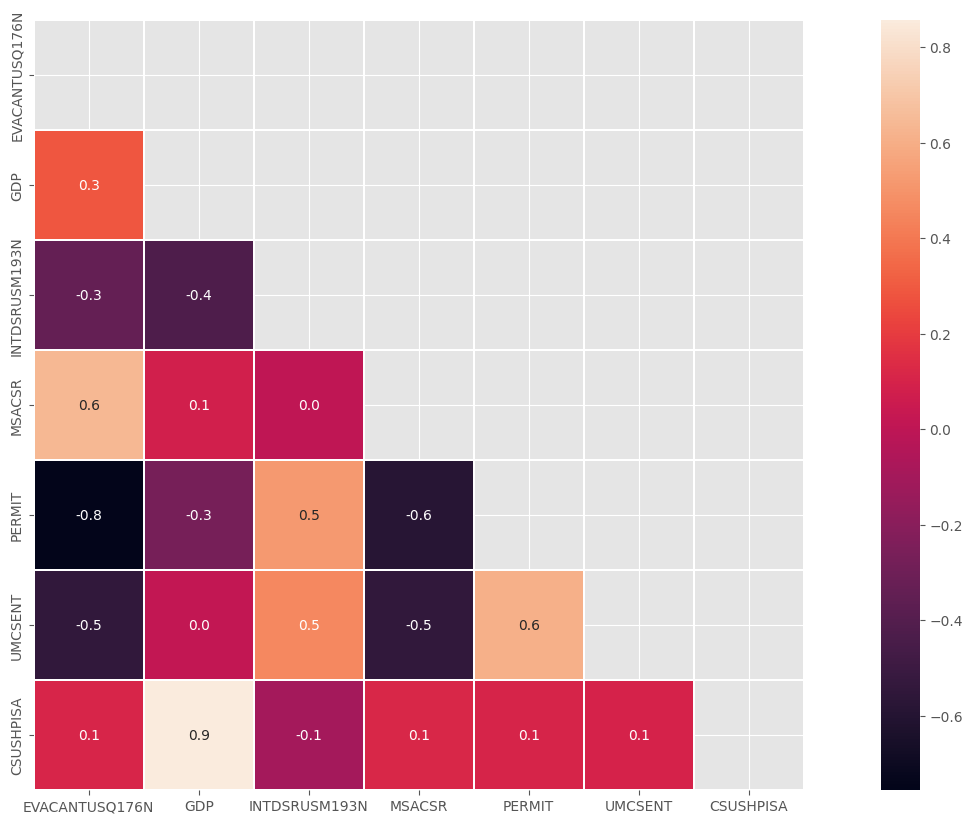

In [20]:
plt.figure(figsize=(20,10))
correlation = df[(X_train.drop('const',axis=1).columns.to_list() + ['CSUSHPISA'])].corr()
mask = np.triu(correlation)
sns.heatmap(correlation,annot=True, mask=mask, fmt='.1f', square=True,linewidth=0.25,linecolor='white')
plt.show()

In [21]:
X_train.drop('EVACANTUSQ176N',axis=1,inplace=True)

In [22]:
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              CSUSHPISA   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     309.0
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           2.00e-38
Time:                        10:12:44   Log-Likelihood:                -197.01
No. Observations:                  60   AIC:                             406.0
Df Residuals:                      54   BIC:                             418.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           160.9617      1.069    150.525

In [23]:
vif =  pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
4,PERMIT,2.91
5,UMCSENT,2.40
3,MSACSR,2.30
2,INTDSRUSM193N,2.21
0,const,1.48
1,GDP,1.40


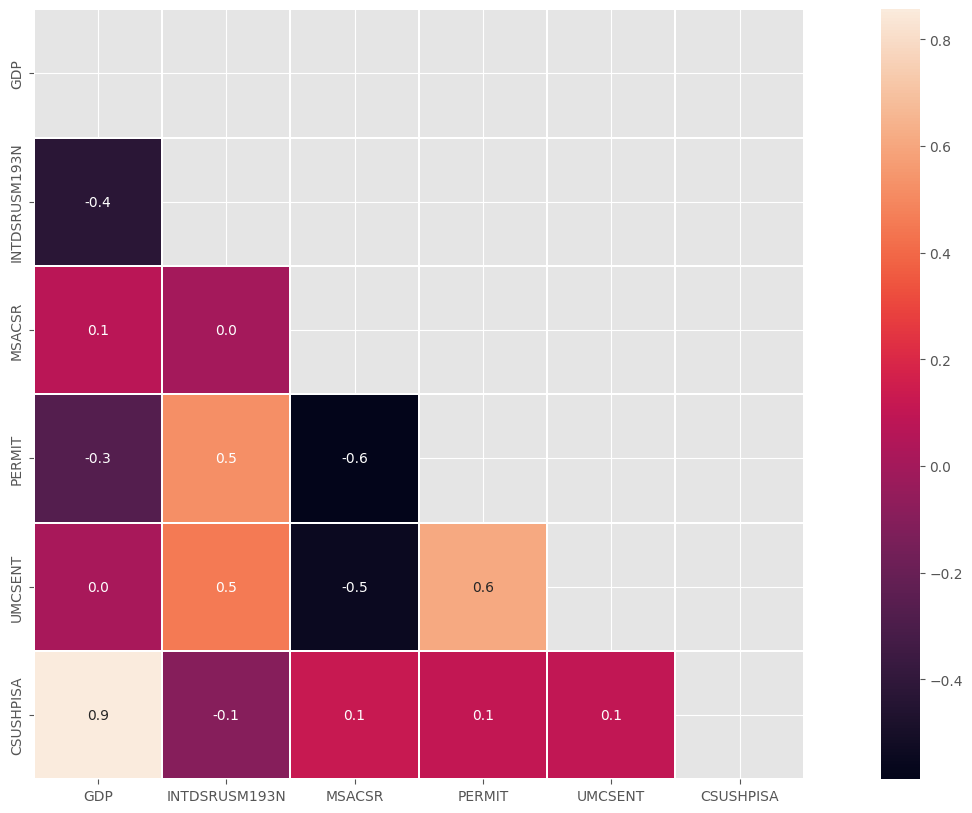

In [24]:
plt.figure(figsize=(20,10))
correlation = df[(X_train.drop('const',axis=1).columns.to_list() + ['CSUSHPISA'])].corr()
mask = np.triu(correlation)
sns.heatmap(correlation,annot=True, mask=mask, fmt='.1f', square=True,linewidth=0.25,linecolor='white')
plt.show()

In [25]:
X_train.drop('INTDSRUSM193N',axis=1,inplace=True)

In [26]:
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              CSUSHPISA   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     380.3
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           2.32e-39
Time:                        10:14:22   Log-Likelihood:                -197.99
No. Observations:                  60   AIC:                             406.0
Df Residuals:                      55   BIC:                             416.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        161.6264      0.954    169.356      0.0

In [27]:
vif =  pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
3,PERMIT,2.39
4,UMCSENT,1.96
2,MSACSR,1.71
1,GDP,1.17
0,const,1.16


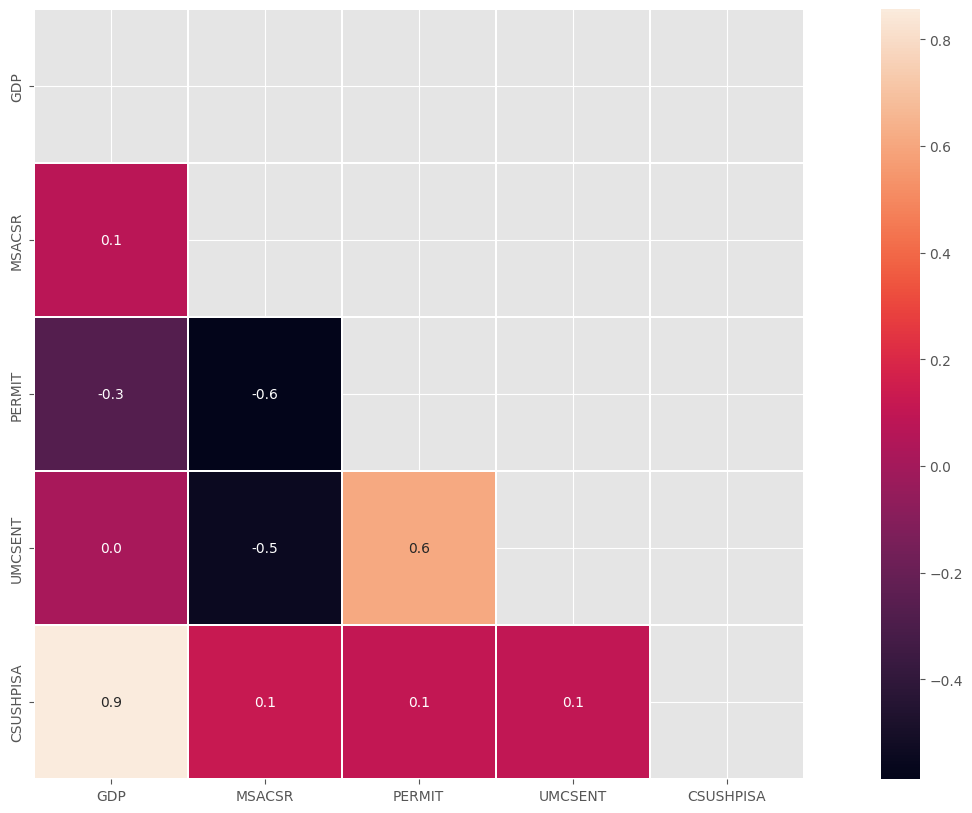

In [29]:
plt.figure(figsize=(20,10))
correlation = df[(X_train.drop('const',axis=1).columns.to_list() + ['CSUSHPISA'])].corr()
mask = np.triu(correlation)
sns.heatmap(correlation,annot=True, mask=mask, fmt='.1f', square=True,linewidth=0.25,linecolor='white')
plt.show()

In [28]:
features_to_drop = ['EVACANTUSQ176N','INTDSRUSM193N']

In [31]:
models_list = [{'LinearRegression':LinearRegression()},
                {'BayesianRidge':BayesianRidge()},
                 {'ElasticNet':ElasticNet()},
                  {'SGDRegressor':SGDRegressor()},
                   {'SVR':SVR(kernel="linear")}]

# Initialize an empty list to store results
results_list = list()

X, y = df.drop('CSUSHPISA', axis=1), df['CSUSHPISA']

# Splitting the data into training and testing sets
# The test set will be 30% of the data, using a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

X_train.drop(features_to_drop,axis=1,inplace=True)
X_test.drop(features_to_drop,axis=1,inplace=True)

# Loop through models_list
for model_info in models_list:
  # Create a pipeline for each model
  pipe = Pipeline([
        ('RobustScaler', RobustScaler()),
        # Add the specific model to the pipeline
        (list(model_info.keys())[0], list(model_info.values())[0])  # model_info[0] is the model name, model_info[-1] is the model object
  ])

  # Fit the pipeline on training data
  pipe.fit(X_train, y_train)

  # Make predictions on training and test data
  X_train_predictions = pipe.predict(X_train)
  X_test_predictions = pipe.predict(X_test)

  # Store model name and its performance metrics in results_list
  results_list.append({
        'Model Name': list(model_info.keys())[0],
        'Model_Coef_Intercept':{'coef':pipe[list(model_info.keys())[0]].coef_,'intercept':pipe[list(model_info.keys())[0]].intercept_},
        'Train Data R2': r2_score(y_train, X_train_predictions),
        'Test Data R2': r2_score(y_test, X_test_predictions),
        'Test Data Residual':y_test-X_test_predictions,
        'R2 Diff': r2_score(y_train, X_train_predictions) - r2_score(y_test, X_test_predictions),
        'Train Data RMSE': np.sqrt(mean_squared_error(y_train, X_train_predictions)),
        'Test Data RMSE': np.sqrt(mean_squared_error(y_test, X_test_predictions)),
        'RMSE Diff': np.sqrt(mean_squared_error(y_train, X_train_predictions)) -  np.sqrt(mean_squared_error(y_test, X_test_predictions))
  })


In [32]:
# Initializing variables to track the best models and their respective metrics

# Loop through the results_list to analyze model performance
for result in results_list:
    # Display performance metrics for each model
    print(f"Name: {result['Model Name']:{25}} TrainR2: {np.round(result['Train Data R2'],2)}, TestR2: {np.round(result['Test Data R2'],2)}, DiffR2: {np.round(result['R2 Diff'],2)}")
    print(f"Name: {result['Model Name']:{25}} TrainRMSE: {np.round(result['Train Data RMSE'],2)}, TestRMSE: {np.round(result['Test Data RMSE'],2)}, DiffRMSE: {np.round(result['RMSE Diff'],2)}")
    print()
    print()


Name: LinearRegression          TrainR2: 0.97, TestR2: 0.93, DiffR2: 0.04
Name: LinearRegression          TrainRMSE: 6.56, TestRMSE: 7.75, DiffRMSE: -1.19


Name: BayesianRidge             TrainR2: 0.97, TestR2: 0.93, DiffR2: 0.04
Name: BayesianRidge             TrainRMSE: 6.56, TestRMSE: 7.73, DiffRMSE: -1.17


Name: ElasticNet                TrainR2: 0.61, TestR2: 0.5, DiffR2: 0.11
Name: ElasticNet                TrainRMSE: 21.93, TestRMSE: 20.5, DiffRMSE: 1.43


Name: SGDRegressor              TrainR2: 0.97, TestR2: 0.93, DiffR2: 0.03
Name: SGDRegressor              TrainRMSE: 6.57, TestRMSE: 7.68, DiffRMSE: -1.11


Name: SVR                       TrainR2: 0.69, TestR2: 0.6, DiffR2: 0.1
Name: SVR                       TrainRMSE: 19.41, TestRMSE: 18.38, DiffRMSE: 1.03




## Model Selection

### Observation Of Model Development
<blockquote style="background-color: #f7dc6f; padding: 10px; border-radius: 5px;">
  <ul>
    <li><strong>Question: Why not use tree-based or deep neural network?</strong>
      <ul>
        <li>We do not want to draw decision boundaries because, as we saw while analyzing things like GDP, Median Sales, or Vacant, or any other aspect affects our Target columns.</li>
        <li>The point here is in the real world, we can't say things go as we expected. That's why we want our model to learn from real-time data observations and predict outcomes based on that.</li>
        <li>In tree-based models, we draw decision boundaries that are good for scenarios with limited possibilities.</li>
        <li>Then what is wrong with Neural Network? We want to know which factors affect more or less in predicting outcomes, which is not known if we work with neural networks.</li>
        <li>Hence, we go with Linear Models. The advantage is they are less complex, and we say there is a linear correlation between the target and independent columns.</li>
      </ul>
     <li><strong>Question: What features contributes in predicting House Price Indexes (CSUSHPISA)</strong>
      <ul>
          <li>We are going to experement with `Linear Regressor` and `SVM` becuase they are best performers.</li>
          <li>Factors (Feature) that have high contributes in predicting target column are as follows</li>
            <ul>
              <li>GDP</li>
              <li>MSACSR</li>
              <li>PERMIT</li>
            </ul>
      </ul>
    </li>
  </ul>
</blockquote>


## Experimentation
<blockquote style="background-color: #f7dc6f; padding: 10px; border-radius: 5px;">
  <ul>
    <li>Experiment with Linear Regressor & SVM model</li>
    <li>Trying Different Parameters</li>
    <li>Evaluating Result</li>
  </ul>
</blockquote>


###  Linear Regressor Model

In [33]:
pipe = Pipeline([
        # Standardize the features
        ('RobustScaler', RobustScaler()),
        # Add the specific model to the pipeline
        ('LinearRegression',LinearRegression())  # model_info[0] is the model name, model_info[-1] is the model object
  ])

param_grid={
    'LinearRegression__positive':[True,False]
}

In [34]:
GScv = GridSearchCV(pipe,param_grid,scoring='neg_root_mean_squared_error',cv=5)

In [35]:
GScv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('RobustScaler', RobustScaler()),
                                       ('LinearRegression',
                                        LinearRegression())]),
             param_grid={'LinearRegression__positive': [True, False]},
             scoring='neg_root_mean_squared_error')

In [36]:
GScv.best_params_

{'LinearRegression__positive': False}

In [37]:
GScv.best_score_

-7.048787151663357

In [38]:
X_test_predictions = GScv.predict(X_test)

In [39]:
np.sqrt(mean_squared_error(y_test, X_test_predictions))

7.750281109939348

In [40]:
r2_score(y_test, X_test_predictions)

0.9287159502193881

In [41]:
pd.DataFrame(GScv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_LinearRegression__positive,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008299,0.004131,0.002174,0.000258,True,{'LinearRegression__positive': True},-7.052056,-8.811443,-8.245016,-5.716378,-9.490505,-7.863080,1.338647,2
1,0.005369,0.000272,0.001854,0.000046,False,{'LinearRegression__positive': False},-4.959633,-8.651818,-6.190750,-7.849486,-7.592248,-7.048787,1.312019,1


In [42]:
LinearR_Residuals = y_test - X_test_predictions

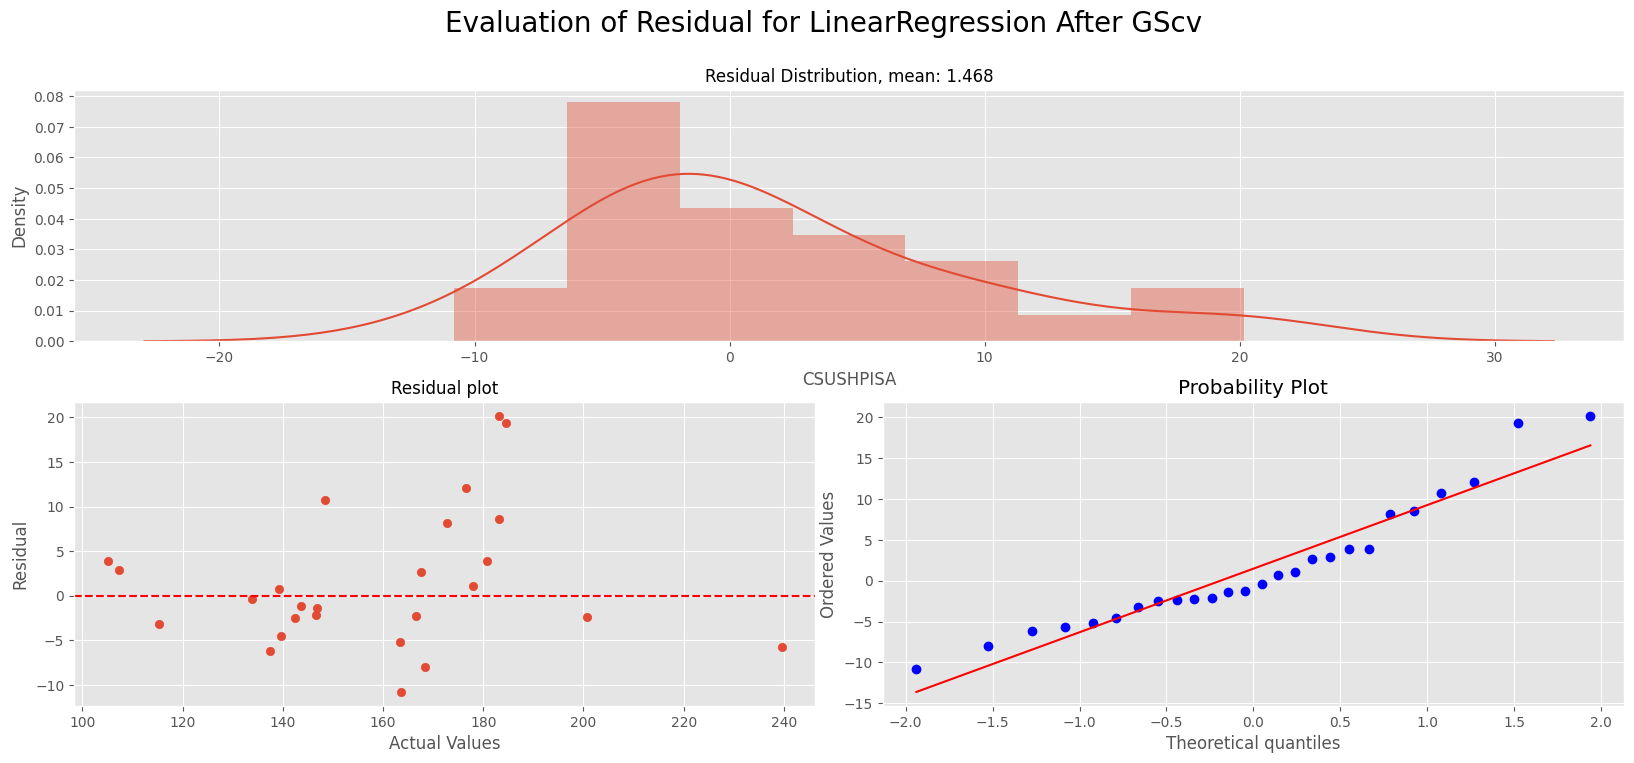

In [43]:
# Create a new figure
fig = plt.figure(figsize=(20, 8))
fig.suptitle(f'Evaluation of Residual for LinearRegression After GScv', fontsize=20)

# Create a grid for subplots
gs = grid.GridSpec(ncols=4, nrows=12)

# Add subplot for Residual Distribution
ax1 = fig.add_subplot(gs[:5, :])
ax1.set_title(f'Residual Distribution, mean: {np.round(LinearR_Residuals.mean(),3)}', fontsize=12)
sns.distplot(LinearR_Residuals, ax=ax1)

# Add subplot for Residual plot
ax2 = fig.add_subplot(gs[6:, :2])
ax2.set_title('Residual plot', fontsize=12)
ax2.scatter(y_test, LinearR_Residuals)
ax2.axhline(y=0, color='r', ls='--')
ax2.set_xlabel('Actual Values')
ax2.set_ylabel('Residual')

# Add subplot for Probability plot
ax3 = fig.add_subplot(gs[6:, 2:])
ax3.set_title('Probability plot', fontsize=12)
stats.probplot(LinearR_Residuals, plot=ax3)

# Display the plot
plt.show()
